   # Hepatitis Classification dataset 

Importing basic inbuilt libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer 


Loading Hepatitis Dataset

In [2]:
data=pd.read_csv(r'C:\Users\dell\Downloads\hepatitis.csv')
#initial first look at our dataset
data.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,61,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,61,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,61,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,105,200,4.0,61,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4.0,75,1


# Data Exploration and Analysis

Variable Identification

In [3]:
#Variables in data
data.columns

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

In [4]:
#getting the shape of data
print(data.shape)


(142, 20)


In [5]:
#getting the data types for each feature
data.dtypes

class               int64
age                 int64
sex                 int64
steroid             int64
antivirals          int64
fatigue             int64
malaise             int64
anorexia            int64
liver_big           int64
liver_firm          int64
spleen_palable      int64
spiders             int64
ascites             int64
varices             int64
bilirubin         float64
alk_phosphate       int64
sgot                int64
albumin           float64
protime             int64
histology           int64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 20 columns):
class             142 non-null int64
age               142 non-null int64
sex               142 non-null int64
steroid           142 non-null int64
antivirals        142 non-null int64
fatigue           142 non-null int64
malaise           142 non-null int64
anorexia          142 non-null int64
liver_big         142 non-null int64
liver_firm        142 non-null int64
spleen_palable    142 non-null int64
spiders           142 non-null int64
ascites           142 non-null int64
varices           142 non-null int64
bilirubin         142 non-null float64
alk_phosphate     142 non-null int64
sgot              142 non-null int64
albumin           142 non-null float64
protime           142 non-null int64
histology         142 non-null int64
dtypes: float64(2), int64(18)
memory usage: 22.3 KB


In [7]:
# Identifying variables with integer datatype
data.dtypes[data.dtypes == 'int64']

class             int64
age               int64
sex               int64
steroid           int64
antivirals        int64
fatigue           int64
malaise           int64
anorexia          int64
liver_big         int64
liver_firm        int64
spleen_palable    int64
spiders           int64
ascites           int64
varices           int64
alk_phosphate     int64
sgot              int64
protime           int64
histology         int64
dtype: object

Getting basic descriptive details about the features 

In [8]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
class,142.0,1.816901,0.388116,1.0,2.00,2.0,2.00,2.0
age,142.0,40.816901,12.189182,7.0,32.00,39.0,50.00,78.0
sex,142.0,1.105634,0.308456,1.0,1.00,1.0,1.00,2.0
steroid,142.0,1.514085,0.501571,1.0,1.00,2.0,2.00,2.0
antivirals,142.0,1.838028,0.369729,1.0,2.00,2.0,2.00,2.0
fatigue,142.0,1.359155,0.481451,1.0,1.00,1.0,2.00,2.0
malaise,142.0,1.619718,0.487174,1.0,1.00,2.0,2.00,2.0
anorexia,142.0,1.795775,0.404561,1.0,2.00,2.0,2.00,2.0
liver_big,142.0,1.823944,0.382216,1.0,2.00,2.0,2.00,2.0
liver_firm,142.0,1.584507,0.494551,1.0,1.00,2.0,2.00,2.0


In [9]:
#no of unique value with their count in each feature
for coln in data.columns:
    print(data[coln].value_counts())

2    116
1     26
Name: class, dtype: int64
38    8
30    8
34    7
36    7
39    6
50    6
44    5
37    5
42    5
45    5
51    5
54    4
28    4
27    4
47    4
32    4
40    3
52    3
20    3
49    3
23    3
56    3
31    3
25    3
57    2
22    2
24    2
61    2
41    2
48    2
58    2
33    2
26    1
78    1
35    1
43    1
72    1
46    1
53    1
59    1
60    1
62    1
64    1
65    1
66    1
69    1
7     1
Name: age, dtype: int64
1    127
2     15
Name: sex, dtype: int64
2    73
1    69
Name: steroid, dtype: int64
2    119
1     23
Name: antivirals, dtype: int64
1    91
2    51
Name: fatigue, dtype: int64
2    88
1    54
Name: malaise, dtype: int64
2    113
1     29
Name: anorexia, dtype: int64
2    117
1     25
Name: liver_big, dtype: int64
2    83
1    59
Name: liver_firm, dtype: int64
2    115
1     27
Name: spleen_palable, dtype: int64
2    95
1    47
Name: spiders, dtype: int64
2    125
1     17
Name: ascites, dtype: int64
2    125
1     17
Name: varices, dtype: int64
1.

# Missing Value Treatment

In [40]:
print(data.isnull().any())

print(data.isnull().sum())


class             False
age               False
sex               False
steroid           False
antivirals        False
fatigue           False
malaise           False
anorexia          False
liver_big         False
liver_firm        False
spleen_palable    False
spiders           False
ascites           False
varices           False
bilirubin         False
alk_phosphate     False
sgot              False
albumin           False
protime           False
histology         False
dtype: bool
class             0
age               0
sex               0
steroid           0
antivirals        0
fatigue           0
malaise           0
anorexia          0
liver_big         0
liver_firm        0
spleen_palable    0
spiders           0
ascites           0
varices           0
bilirubin         0
alk_phosphate     0
sgot              0
albumin           0
protime           0
histology         0
dtype: int64


As we can see our dataset is free from any missing value. So there is no need to treat it.

# Working With Cetagorical data

In [41]:
data.dtypes[data.dtypes=='Cetagory'].any()

False

so there is No cetagorical column in our dataset that has cetagorical data. Thus we can continue to use or work with data as such. No label encoding is required.

**Seperating data features and the target

In [42]:
x=data.drop('class',axis=1) # x contains only the features 
y=data['class']             #y is our target
dataset=data                #keep a copy of original dataset


# Target

In [43]:
y=data['class']
y

0      2
1      2
2      2
3      2
4      2
5      1
6      2
7      2
8      2
9      2
10     2
11     2
12     2
13     2
14     2
15     2
16     2
17     2
18     2
19     2
20     2
21     2
22     2
23     2
24     2
25     2
26     2
27     2
28     2
29     1
      ..
112    2
113    2
114    2
115    2
116    2
117    1
118    2
119    1
120    2
121    1
122    2
123    2
124    1
125    2
126    2
127    2
128    1
129    2
130    2
131    2
132    1
133    1
134    2
135    2
136    2
137    1
138    2
139    2
140    2
141    1
Name: class, Length: 142, dtype: int64

In [44]:
y.shape

(142,)

In [45]:
y.dtype

dtype('int64')

In [46]:
data['class'].mode()

0    2
dtype: int64

In [47]:
data['class'].value_counts()

2    116
1     26
Name: class, dtype: int64

Text(0, 0.5, 'COUNT')

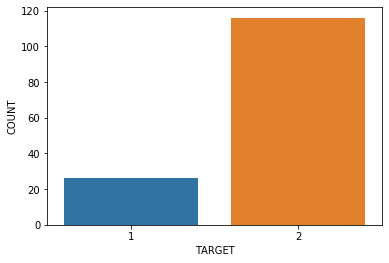

In [48]:

sns.countplot(x='class',data=data)
plt.xlabel("TARGET")
plt.ylabel("COUNT")


# Data Features

In [49]:
x=data.drop('class',axis=1)
x.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.00,61,1
1,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.50,61,1
2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.00,61,1
3,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,105,200,4.00,61,1
4,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.00,75,1
5,51,1,1,2,1,2,1,2,2,1,1,2,2,1.42,105,85,3.81,61,1
6,23,1,2,2,2,2,2,2,2,2,2,2,2,1.00,105,85,3.81,61,1
7,39,1,2,2,1,2,2,2,1,2,2,2,2,0.70,105,48,4.40,61,1
8,30,1,2,2,2,2,2,2,2,2,2,2,2,1.00,105,120,3.90,61,1
9,39,1,1,1,2,2,2,1,1,2,2,2,2,1.30,78,30,4.40,85,1


In [50]:
x.shape

(142, 19)

In [51]:
x.columns

Index(['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
       'liver_big', 'liver_firm', 'spleen_palable', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
       'histology'],
      dtype='object')

# corelation of features with Target

In [52]:
#computing pairwise corelation of features with the target
pairwise_corelation=x.corrwith(y)
print(pairwise_corelation)

age              -0.160050
sex               0.162705
steroid           0.086206
antivirals       -0.109289
fatigue           0.278514
malaise           0.341807
anorexia          0.166678
liver_big        -0.075417
liver_firm        0.081185
spleen_palable    0.188224
spiders           0.402217
ascites           0.498499
varices           0.386317
bilirubin        -0.461533
alk_phosphate    -0.149718
sgot             -0.025457
albumin           0.454181
protime           0.298737
histology        -0.310245
dtype: float64


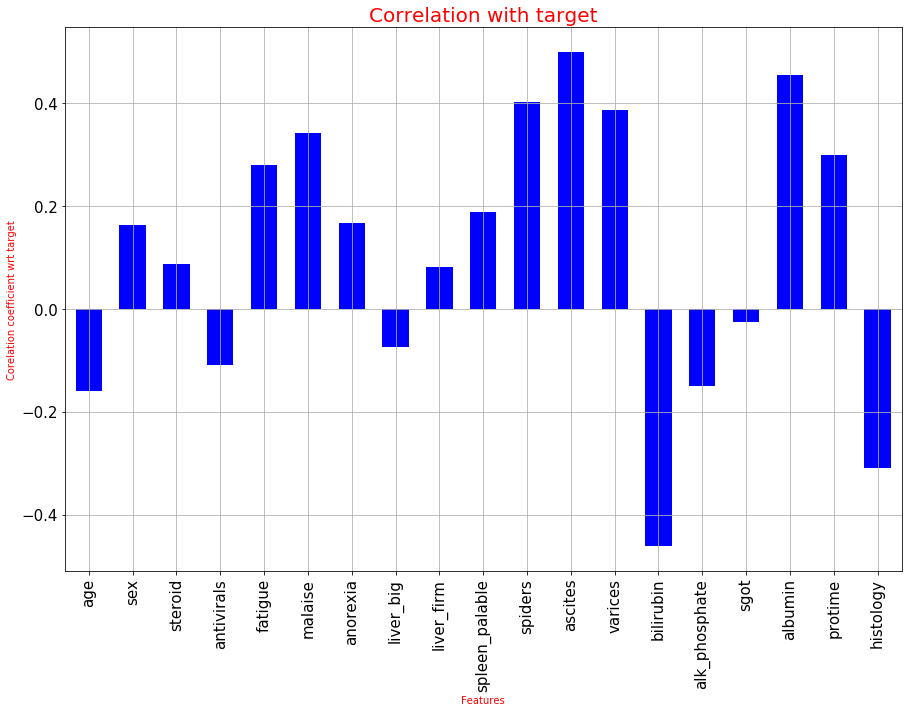

In [53]:
pairwise_corelation.plot(kind='bar', grid=True, figsize=(15,10), color='blue', width=0.6)
plt.title("Correlation with target", size=20,color='red')
plt.xticks(size=15, rotation=90)
plt.ylabel("Corelation coefficient wrt target",color='red')
plt.xlabel("Features",color='red')

plt.yticks(size=15)
plt.show()

# removing columns with least value of corelation coefficient

In [54]:
neg_corel_col=['bilirubin','histology','age']
original_x=x
x.drop(neg_corel_col,axis=1,inplace=True)
x.head()


,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,alk_phosphate,sgot,albumin,protime
0,2,1,2,2,2,2,1,2,2,2,2,2,85,18,4.0,61
1,1,1,2,1,2,2,1,2,2,2,2,2,135,42,3.5,61
2,1,2,2,1,2,2,2,2,2,2,2,2,96,32,4.0,61
3,1,2,2,2,2,2,2,2,2,2,2,2,105,200,4.0,61
4,1,2,2,2,2,2,2,2,2,2,2,2,95,28,4.0,75


# Scaling the features(Standardization)

In [55]:

col_names = ['alk_phosphate', 'sgot','albumin', 'protime']

features = data[col_names]
features.head()

,alk_phosphate,sgot,albumin,protime
0,85,18,4.0,61
1,135,42,3.5,61
2,96,32,4.0,61
3,105,200,4.0,61
4,95,28,4.0,75


In [69]:
#standardization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler().fit(features.values)

features_std=sc.transform(features.values)
std_df=pd.DataFrame(features_std,columns=col)
std_df.head()

,alk_phosphate,sgot,albumin,protime
0,-0.437381,-0.797631,0.275208,-0.039935
1,0.621762,-0.505401,-0.536582,-0.039935
2,-0.204370,-0.627163,0.275208,-0.039935
3,-0.013724,1.418449,0.275208,-0.039935
4,-0.225553,-0.675869,0.275208,0.753972


In [72]:
x.columns
x.drop(col_names,inplace=True,axis=1)

In [78]:
x['alk_phosphate']=std_df['alk_phosphate']
x['sgot']=std_df['sgot']
x['albumin']=std_df['albumin']
x['protime']=std_df['protime']
x.head()





,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,alk_phosphate,sgot,albumin,protime
0,2,1,2,2,2,2,1,2,2,2,2,2,-0.437381,-0.797631,0.275208,-0.039935
1,1,1,2,1,2,2,1,2,2,2,2,2,0.621762,-0.505401,-0.536582,-0.039935
2,1,2,2,1,2,2,2,2,2,2,2,2,-0.204370,-0.627163,0.275208,-0.039935
3,1,2,2,2,2,2,2,2,2,2,2,2,-0.013724,1.418449,0.275208,-0.039935
4,1,2,2,2,2,2,2,2,2,2,2,2,-0.225553,-0.675869,0.275208,0.753972


# splitting train and test data

In [79]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [80]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(99, 16) (99,)
(43, 16) (43,)


# Model building 

  1. SVM
  2. Perceptron
  3. Logistic Regression

# 1. Support Vector Machine Classifier

In [82]:
#SVM
from sklearn.svm import SVC
svm=SVC(kernel='linear',C=1,random_state=0)
svm.fit(x_train,y_train)


SVC(C=1, kernel='linear', random_state=0)

Predicted target Values

In [83]:
y_train_pred=svm.predict(x_train)
print("PREDICTED target Values are:")
print(y_train_pred)

PREDICTED target Values are:
[2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 1 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2
 2 2 2 1 2 2 2 2 2 1 2 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2]


# Accuracy

In [84]:
from sklearn.metrics import accuracy_score
print("TRAINING ACCURACY of SVM Model is:",accuracy_score(y_train,y_train_pred))


TRAINING ACCURACY of SVM Model is: 0.898989898989899


In [86]:
y_test_pred=svm.predict(x_test)
print("TESTING DATA's ACCURACY of SVM Model is:",accuracy_score(y_test,y_test_pred))

TESTING DATA's ACCURACY of SVM Model is: 0.8604651162790697


# confusion matrix 

In [87]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_test_pred))

[[ 7  4]
 [ 2 30]]


# classification report

In [88]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           1       0.78      0.64      0.70        11
           2       0.88      0.94      0.91        32

    accuracy                           0.86        43
   macro avg       0.83      0.79      0.80        43
weighted avg       0.86      0.86      0.86        43



# 2. Perceptron Classifier

In [90]:
# Training of perceptron model
from sklearn.linear_model import Perceptron
pc=Perceptron(penalty='l2')   #l2 regularization
pc.fit(x_train,y_train)



Perceptron(penalty='l2')

Predicted Target Values

In [92]:
print("Predicted target values of test Data are:")
pr_y_predict_train=pc.predict(x_train)  #predict the values of train dataset

pr_y_predict_test=pc.predict(x_test)  #predict the values of test dataset
print(pr_y_predict_test)

Predicted target values of test Data are:
[2 2 1 1 2 2 1 2 2 1 1 1 1 2 1 2 2 2 2 1 2 2 1 2 2 2 1 2 1 2 2 1 1 2 2 2 2
 2 1 2 1 1 2]


# Accuracy 

Training data Accuracy

In [93]:
accuracy_score(y_train,pr_y_predict_train)

0.797979797979798

Testing Data Sccuracy

In [95]:
#acc of test data now
predict_test=pc.predict(x_test)
accuracy_score(y_test,predict_test)

0.7209302325581395

# confusion matrix

In [96]:
print(confusion_matrix(y_test,pr_y_predict_test))

[[ 8  3]
 [ 9 23]]


# classification report

In [97]:
print(classification_report(y_test,pr_y_predict_test))

              precision    recall  f1-score   support

           1       0.47      0.73      0.57        11
           2       0.88      0.72      0.79        32

    accuracy                           0.72        43
   macro avg       0.68      0.72      0.68        43
weighted avg       0.78      0.72      0.74        43



# 3. Logistic Regression

In [98]:
#importing the libraries
from sklearn.linear_model import LogisticRegression

Training

In [100]:
lr=LogisticRegression()
lr.fit(x_train,y_train)


LogisticRegression()

Predicting target values 

In [103]:
lr_pred_train=lr.predict(x_train)

lr_pred_test=lr.predict(x_test)
lr_pred_test

array([2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2],
      dtype=int64)

# Accuracy

In [104]:
print("TRAINING ACCURACY of Log Reg is:",accuracy_score(y_train,lr_pred_train))


TRAINING ACCURACY of Log Reg is: 0.9090909090909091


In [105]:
print("TESTIND DATA ACCURACY of Log Reg is:",accuracy_score(y_test,lr_pred_test))


TESTIND DATA ACCURACY of Log Reg is: 0.8837209302325582


# Confusion matrix

In [106]:
print(confusion_matrix(y_test,lr_pred_test))

[[ 6  5]
 [ 0 32]]


# Classification report

In [107]:
print(classification_report(y_test,lr_pred_test))

              precision    recall  f1-score   support

           1       1.00      0.55      0.71        11
           2       0.86      1.00      0.93        32

    accuracy                           0.88        43
   macro avg       0.93      0.77      0.82        43
weighted avg       0.90      0.88      0.87        43

